# Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data in dataframe

In [2]:
# data_path = 'Free-to-play games'

# data = pd.read_csv(data_path)
data = pd.read_csv('/kaggle/input/free-to-play-games-dataset/Free-to-play games')

df = pd.DataFrame(data = data)

In [3]:
df.head()

,title,thumbnail,short_description,game_url,genre,platform,publisher,developer,release_date,freetogame_profile_url
0,Tarisland,https://www.freetogame.com/g/582/thumbnail.jpg,A cross-platform MMORPG developed by Level Inf...,https://www.freetogame.com/open/tarisland,MMORPG,PC (Windows),Tencent,Level Infinite,2024-06-22,https://www.freetogame.com/tarisland
1,Overwatch 2,https://www.freetogame.com/g/540/thumbnail.jpg,A hero-focused first-person team shooter from ...,https://www.freetogame.com/open/overwatch-2,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2
2,PUBG: BATTLEGROUNDS,https://www.freetogame.com/g/516/thumbnail.jpg,Get into the action in one of the longest runn...,https://www.freetogame.com/open/pubg,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg
3,Enlisted,https://www.freetogame.com/g/508/thumbnail.jpg,Get ready to command your own World War II mil...,https://www.freetogame.com/open/enlisted,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted
4,Genshin Impact,https://www.freetogame.com/g/475/thumbnail.jpg,If you’ve been looking for a game to scratch t...,https://www.freetogame.com/open/genshin-impact,Action RPG,PC (Windows),miHoYo,miHoYo,2020-09-28,https://www.freetogame.com/genshin-impact


# Info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   328 non-null    object
 1   thumbnail               328 non-null    object
 2   short_description       328 non-null    object
 3   game_url                328 non-null    object
 4   genre                   328 non-null    object
 5   platform                328 non-null    object
 6   publisher               328 non-null    object
 7   developer               328 non-null    object
 8   release_date            328 non-null    object
 9   freetogame_profile_url  328 non-null    object
dtypes: object(10)
memory usage: 25.8+ KB


# Check for missing values

In [5]:
df.isna().sum() / df.shape[0] * 100

title                     0.0
thumbnail                 0.0
short_description         0.0
game_url                  0.0
genre                     0.0
platform                  0.0
publisher                 0.0
developer                 0.0
release_date              0.0
freetogame_profile_url    0.0
dtype: float64

No missing values !

# Check info and percentage of unique values

In [6]:
df.nunique() / df.shape[0] * 100

title                     100.000000
thumbnail                 100.000000
short_description         100.000000
game_url                  100.000000
genre                       5.487805
platform                    0.609756
publisher                  80.182927
developer                  88.719512
release_date               97.256098
freetogame_profile_url    100.000000
dtype: float64

# Check how many games published for each platform

In [7]:
df['platform'].value_counts()

platform
PC (Windows)                 317
PC (Windows), Web Browser     11
Name: count, dtype: int64

In [8]:
df.groupby(by = 'platform').count()

,title,thumbnail,short_description,game_url,genre,publisher,developer,release_date,freetogame_profile_url
platform,,,,,,,,,
PC (Windows),317,317,317,317,317,317,317,317,317
"PC (Windows), Web Browser",11,11,11,11,11,11,11,11,11


# Number of  the developers and publishers

In [9]:
publishers_num = df['publisher'].nunique()
developers_num = df['developer'].nunique()
print(f'number of publishers : {publishers_num}')
print(f'number of developers : {developers_num}')

number of publishers : 263
number of developers : 291


# Finding most repeated word in short description

In [10]:
df['short_description']

0      A cross-platform MMORPG developed by Level Inf...
1      A hero-focused first-person team shooter from ...
2      Get into the action in one of the longest runn...
3      Get ready to command your own World War II mil...
4      If you’ve been looking for a game to scratch t...
                             ...                        
323    A popular fantasy MMORPG, back to the golden a...
324    A 3D MMO Multi Virtual World Real Cash Economy...
325    A free to play Sci-Fi MMO that has withstood t...
326    A free to play MMORPG set in the world of J.R....
327    A old-school free-to-play massively multiplaye...
Name: short_description, Length: 328, dtype: object

In [11]:
##split each description into list of words
words = df['short_description'].str.split()
words_list = []

## Adding words separately to words list
for row in range(0, 328):
    for word in range(0, len(words[row])):
        words_list.append(words[row][word].lower())

words_list

## Making dictionary for each word:
words_count = {word: 0 for word in words_list}
for word in words_count:
    count = words_list.count(word)
    words_count[word] = count
words_list

['a',
 'cross-platform',
 'mmorpg',
 'developed',
 'by',
 'level',
 'infinite',
 'and',
 'published',
 'by',
 'tencent.',
 'a',
 'hero-focused',
 'first-person',
 'team',
 'shooter',
 'from',
 'blizzard',
 'entertainment.',
 'get',
 'into',
 'the',
 'action',
 'in',
 'one',
 'of',
 'the',
 'longest',
 'running',
 'battle',
 'royale',
 'games',
 'pubg',
 'battlegrounds.',
 'get',
 'ready',
 'to',
 'command',
 'your',
 'own',
 'world',
 'war',
 'ii',
 'military',
 'squad',
 'in',
 'gaijin',
 'and',
 'darkflow',
 'software’s',
 'mmo',
 'squad-based',
 'shooter',
 'enlisted.',
 'if',
 'you’ve',
 'been',
 'looking',
 'for',
 'a',
 'game',
 'to',
 'scratch',
 'that',
 'open-world',
 'action',
 'rpg',
 'itch,',
 'one',
 'with',
 'perhaps',
 'a',
 'bit',
 'of',
 'asian',
 'flair,',
 'then',
 'you’re',
 'going',
 'to',
 'want',
 'to',
 'check',
 'out',
 'mihoyo’s',
 'genshin',
 'impact.',
 'play',
 'the',
 'most',
 'competitive',
 'massively',
 'multiplayer',
 'party',
 'royale',
 'game',
 'fea

In [12]:
# Creating dataframe of words count

## Step 1: convert the dictionary into Series.
words_series = pd.Series(words_count)
## Step 2: convert the series into DataFrame.
words_dataframe = words_series.to_frame()
words_dataframe = words_dataframe.rename(columns= {0: 'Repeated'})
words_dataframe

,Repeated
a,360
cross-platform,5
mmorpg,78
developed,37
by,62
...,...
withstood,1
time.,1
j.r.r.,1
tolkien's,1


# check for genre trending

<Axes: xlabel='genre'>

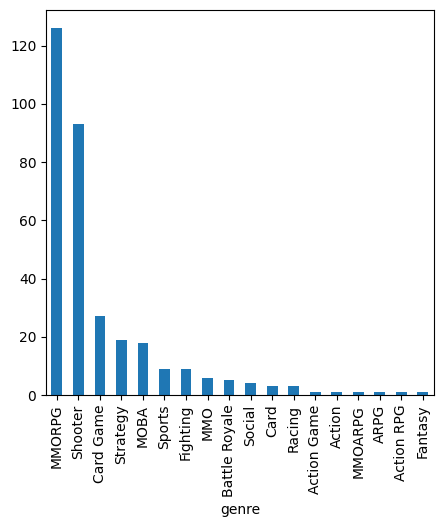

In [13]:
## Plot setup
plt.figure(figsize = (5, 5))
plt.xticks(rotation = 90)
df['genre'].value_counts().plot(kind = 'bar')

# plot for trending in platform

<Axes: xlabel='platform'>

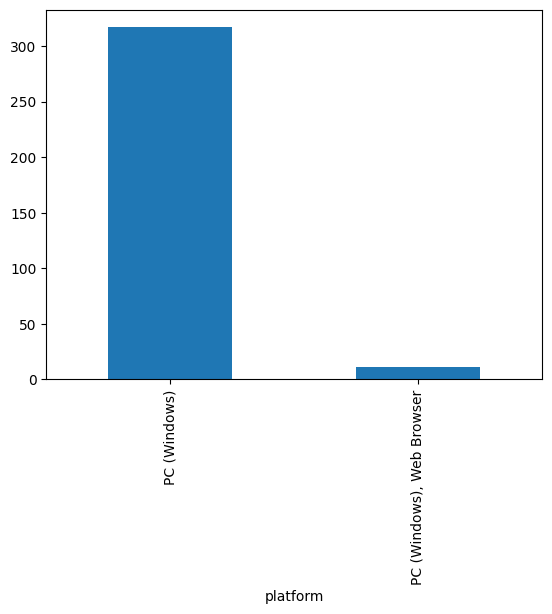

In [14]:
df['platform'].value_counts().plot(kind = 'bar')

# Repitation of words using plot

<Axes: ylabel='Repeated'>

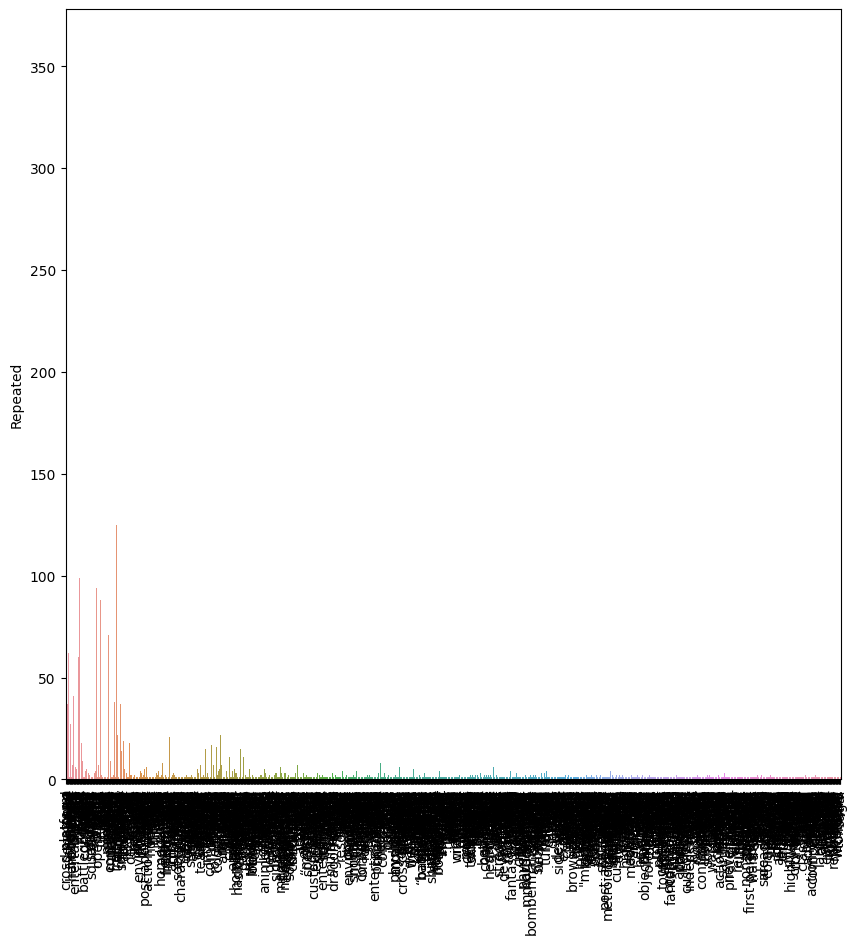

In [15]:
plt.figure(figsize= (10, 10))
plt.xticks(rotation = 90)
sns.barplot(x = words_dataframe.index, y = words_dataframe['Repeated'])

<Axes: >

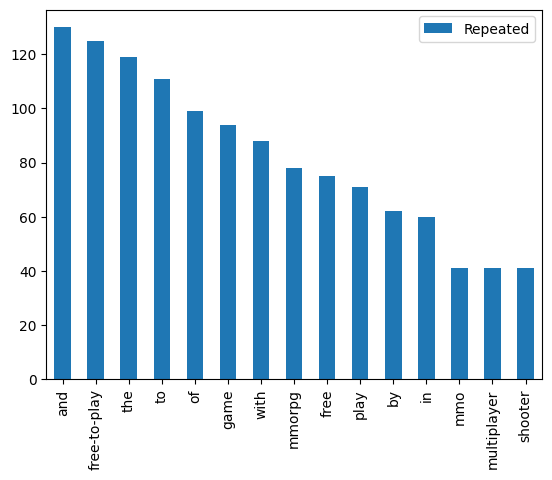

In [16]:
## as the x axis are for for the words and we have 1309 different word im gonna plot top 15 most repeated words
## and doesnt consider 'a' as a word

words_dataframe = words_dataframe.sort_values(by = 'Repeated', ascending = False).drop(index= ['a'])
words_dataframe.head(15).plot(kind = 'bar')

In [17]:
! pip install wordcloud

# Plot of words frequency with wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=600, background_color="white", stopwords=stopwords,
                      max_font_size=40, max_words=200)

words_count = words_dataframe['Repeated'].to_dict()

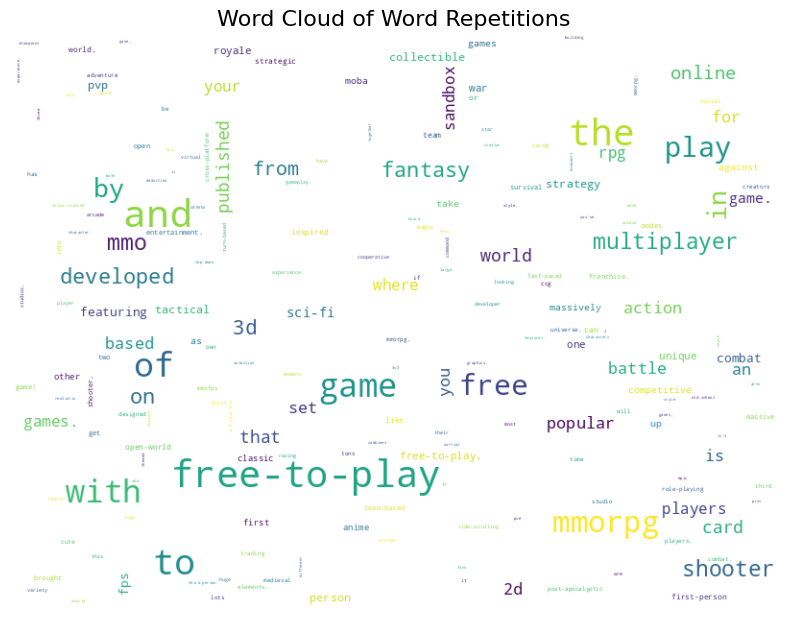

In [20]:
#Generate wordcloud

wordcloud.generate_from_frequencies(words_count)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Word Repetitions", fontsize=16)
plt.tight_layout(pad=0) 

plt.show()